In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

import ppg2ppgi_animation as p2p

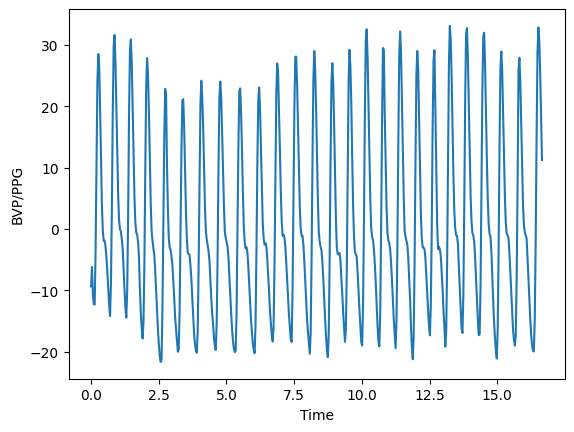

In [2]:
time, bvp = p2p.readPPG(r"X:\PPGI\KISMED\p001.zip", "v01")

plt.plot(time[:500], bvp[:500])
plt.xlabel("Time")
plt.ylabel("BVP/PPG")
plt.savefig("ppg.svg")
plt.show()

In [ ]:
patients = ["p001", "p002", "p003", "p004", "p005", "p006", "p007", "p008", "p009", "p010"]
trials = ["v01", "v02", "v03", "v04", "v05", "v06", "v07", "v08", "v09"]

dir = r"X:\PPGI\KISMED"
errs = []

for p in patients:
    path = os.path.join(dir, f"{p}.zip")
    for t in trials:

        time, bvp = p2p.readPPG(path, t)
        avs, mags, time = p2p.getKeyframes(time, bvp)
        nmae = p2p.verifyAnimation(bvp, avs, mags, time)
        errs.append(nmae)

summed Error: 1.739075029816295e-11
Array size: 1800
BVp std: 0.4500087498503178
NMAE: 2.146964463832644e-14
summed Error: 1.900423145673874e-11
Array size: 1801
BVp std: 0.43968835427750913
NMAE: 2.3998916540470042e-14
summed Error: 1.1228908888870695e-11
Array size: 1800
BVp std: 0.2753183631425415
NMAE: 2.2658433112975862e-14
summed Error: 7.037067478211922e-11
Array size: 3600
BVp std: 0.43590480269240917
NMAE: 4.484329959423084e-14
summed Error: 3.221347693530951e-11
Array size: 3604
BVp std: 0.30204736788956765
NMAE: 2.9592234833133135e-14


In [5]:
print(f"Max Error: {np.max(errs)}")
print(f"Min Error: {np.min(errs)}")
print(f"Mean Error: {np.mean(errs)}")
print(f"Std Error: {np.std(errs)}")

Max Error: nan
Min Error: nan
Mean Error: nan
Std Error: nan
